In [108]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

In [109]:
attacks = pd.read_csv('C:/Users/marti/OneDrive/Escritorio/ironhack/projects/Sharks/data/attacks.csv', encoding = 'unicode_escape')
attacks
# Reads the csv file. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
attacks.columns
# Checks the name of the columns. 

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [111]:
attacks.dtypes
# Checks the type of the objects. 

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [112]:
attacks.shape
# Checks the shape of the dataframe (rows, columns).

(25723, 24)

In [113]:
attacks.isnull().sum()
# Checks how many NaN there are in the whole dataframe.

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [114]:
attacks.dropna(how = "all", inplace=True)
attacks
# Deletes all rows with all columns in NaN. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
attacks.isnull().sum()
# Checks how many NaN there are in each column after previous step.

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [116]:
attacks.sort_values(by = ["Case Number"], ascending=(True))
# Orders the df in an ascending order according to the "Case Number."

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8579,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6982,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6981,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6980,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6979,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,ND.0102,"No date, Before 1963",0.0,Unprovoked,BAHREIN,NaN,NaN,Pearl diving,male,M,...,Tiger shark,A.C. Doyle,ND-0102-Bahrein.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0102,ND.0102,88.0,NaN,NaN
6214,ND.0104,1950s,0.0,Unprovoked,AUSTRALIA,Torres Strait,NaN,Helmet diving,male,M,...,Tiger shark,"A. Seekee & R. Callinan, Courier-Mail, 7/7/199...",ND-0104-HelmetDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0104,ND.0104,89.0,NaN,NaN
6209,ND.0110,"No date, late 1960s",0.0,Unprovoked,VENEZUELA,Los Roques Islands,NaN,Spearfishing,4 French divers,M,...,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,ND-0110-FrenchDivers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0110,ND.0110,94.0,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
bool_series = attacks["Case Number"].duplicated(keep = False)
attacks
# Extracts the duplicates based on the "Case Number".

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
country = attacks["Country"].value_counts()
country
# Counts the repetition of each value in the column "Country".

Country
USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: count, Length: 212, dtype: int64

In [119]:
attacks["Country"].tolist()
# Prints the list of "Country".

['USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'MEXICO',
 'AUSTRALIA',
 'BRAZIL',
 'USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'ENGLAND',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'THAILAND',
 'COSTA RICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'MALDIVES',
 'SOUTH AFRICA',
 'USA',
 'THAILAND',
 'BRAZIL',
 'AUSTRALIA',
 'AUSTRALIA',
 'BAHAMAS',
 'BRAZIL',
 'NEW CALEDONIA',
 'BAHAMAS',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'ECUADOR',
 'AUSTRALIA',
 'AUSTRALIA',
 'NEW CALEDONIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'AUSTRALIA',
 'USA',
 'USA',
 'MALAYSIA',
 'BAHAMAS',
 'COSTA RICA',
 'COSTA RICA',
 'LIBYA',
 'USA',
 'USA',
 nan,
 'AUSTRALIA',
 'CUBA',
 'AUSTRALIA',
 'AUSTRALIA',
 'USA',
 'MAURITIUS',
 'USA',
 'USA',
 'AUSTRALIA',
 'NEW ZEALAND',
 'USA',
 'USA',
 'USA',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'USA',
 'SPAIN',
 'USA',

In [120]:
orig_country = ["NEW CALEDONIA", "ST HELENA, British overseas territory", "REUNION", "FRENCH POLYNESIA", "COLUMBIA", "CAYMAN ISLANDS", "SAN MARTIN", "DIEGO GARCIA", "GUAM", "TURKS & CAICOS", "AZORES"]
new_country = ["FRANCE", "UNITED KINGDOM", "FRANCE", "FRANCE", "COLOMBIA", "UNITED KINGDOM", "FRANCE", "UNITED KINGDOM", "USA", "UNITED KINGDOM", "PORTUGAL"]

country_mapping = dict(zip(orig_country, new_country))
attacks["Country"] = attacks["Country"].replace(country_mapping)

# Substitutes islands and wrongly typed countries for their corresponding country. 

In [121]:
attacks["Country"].tolist()
# Prints the list of "Country" after doing the previous substitution.

['USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'MEXICO',
 'AUSTRALIA',
 'BRAZIL',
 'USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'ENGLAND',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'THAILAND',
 'COSTA RICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'MALDIVES',
 'SOUTH AFRICA',
 'USA',
 'THAILAND',
 'BRAZIL',
 'AUSTRALIA',
 'AUSTRALIA',
 'BAHAMAS',
 'BRAZIL',
 'FRANCE',
 'BAHAMAS',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'ECUADOR',
 'AUSTRALIA',
 'AUSTRALIA',
 'FRANCE',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'AUSTRALIA',
 'USA',
 'USA',
 'MALAYSIA',
 'BAHAMAS',
 'COSTA RICA',
 'COSTA RICA',
 'LIBYA',
 'USA',
 'USA',
 nan,
 'AUSTRALIA',
 'CUBA',
 'AUSTRALIA',
 'AUSTRALIA',
 'USA',
 'MAURITIUS',
 'USA',
 'USA',
 'AUSTRALIA',
 'NEW ZEALAND',
 'USA',
 'USA',
 'USA',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'USA',
 'SPAIN',
 'USA',
 'SOUTH AFRIC

In [122]:
country = attacks["Country"].value_counts()
country
# Counts the repetition of each value in the column "Country".

Country
USA                           2233
AUSTRALIA                     1338
SOUTH AFRICA                   579
FRANCE                         151
PAPUA NEW GUINEA               134
                              ... 
GABON                            1
ANDAMAN / NICOBAR ISLANDAS       1
MALDIVE ISLANDS                  1
NICARAGUA                        1
CEYLON (SRI LANKA)               1
Name: count, Length: 203, dtype: int64

In [123]:
attacks['Country'] = attacks['Country'].str.upper()
# Transforms all the values into upper case.

In [124]:
attacks["Country"].tolist()
# Prints the list of "Country" after changing all values into upper case.

['USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'MEXICO',
 'AUSTRALIA',
 'BRAZIL',
 'USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'ENGLAND',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'THAILAND',
 'COSTA RICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'MALDIVES',
 'SOUTH AFRICA',
 'USA',
 'THAILAND',
 'BRAZIL',
 'AUSTRALIA',
 'AUSTRALIA',
 'BAHAMAS',
 'BRAZIL',
 'FRANCE',
 'BAHAMAS',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'ECUADOR',
 'AUSTRALIA',
 'AUSTRALIA',
 'FRANCE',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'AUSTRALIA',
 'USA',
 'USA',
 'MALAYSIA',
 'BAHAMAS',
 'COSTA RICA',
 'COSTA RICA',
 'LIBYA',
 'USA',
 'USA',
 nan,
 'AUSTRALIA',
 'CUBA',
 'AUSTRALIA',
 'AUSTRALIA',
 'USA',
 'MAURITIUS',
 'USA',
 'USA',
 'AUSTRALIA',
 'NEW ZEALAND',
 'USA',
 'USA',
 'USA',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'USA',
 'SPAIN',
 'USA',
 'SOUTH AFRIC

In [125]:
country = attacks["Country"].value_counts()
country
# Counts the repetition of each value in the column "Country".

Country
USA                           2233
AUSTRALIA                     1338
SOUTH AFRICA                   579
FRANCE                         151
PAPUA NEW GUINEA               134
                              ... 
GABON                            1
ANDAMAN / NICOBAR ISLANDAS       1
MALDIVE ISLANDS                  1
NICARAGUA                        1
CEYLON (SRI LANKA)               1
Name: count, Length: 200, dtype: int64

In [126]:
attacks["Country"] = attacks["Country"].replace("ATLANTIC OCEAN", "NaN")
# Replaces "ATLANTIC OCEAN" with "NaN".

In [127]:
attacks["Country"].tolist()
# Prints the list of "Country" after changing "ATLANTIC OCEAN" into "NaN".

['USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'MEXICO',
 'AUSTRALIA',
 'BRAZIL',
 'USA',
 'USA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'ENGLAND',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'THAILAND',
 'COSTA RICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'MALDIVES',
 'SOUTH AFRICA',
 'USA',
 'THAILAND',
 'BRAZIL',
 'AUSTRALIA',
 'AUSTRALIA',
 'BAHAMAS',
 'BRAZIL',
 'FRANCE',
 'BAHAMAS',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'ECUADOR',
 'AUSTRALIA',
 'AUSTRALIA',
 'FRANCE',
 'AUSTRALIA',
 'AUSTRALIA',
 'BRAZIL',
 'AUSTRALIA',
 'USA',
 'USA',
 'MALAYSIA',
 'BAHAMAS',
 'COSTA RICA',
 'COSTA RICA',
 'LIBYA',
 'USA',
 'USA',
 nan,
 'AUSTRALIA',
 'CUBA',
 'AUSTRALIA',
 'AUSTRALIA',
 'USA',
 'MAURITIUS',
 'USA',
 'USA',
 'AUSTRALIA',
 'NEW ZEALAND',
 'USA',
 'USA',
 'USA',
 'SOUTH AFRICA',
 'USA',
 'AUSTRALIA',
 'USA',
 'USA',
 'USA',
 'SPAIN',
 'USA',
 'SOUTH AFRIC

In [128]:
country = attacks["Country"].value_counts()
country
# Counts the repetition of each value in the column "Country".

Country
USA                           2233
AUSTRALIA                     1338
SOUTH AFRICA                   579
FRANCE                         151
PAPUA NEW GUINEA               134
                              ... 
GABON                            1
ANDAMAN / NICOBAR ISLANDAS       1
MALDIVE ISLANDS                  1
NICARAGUA                        1
CEYLON (SRI LANKA)               1
Name: count, Length: 200, dtype: int64

In [129]:
Species = attacks["Species "].value_counts()
Species 
# Counts the repetition of each value in the column "Species".

Species 
White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                    

In [130]:
attacks["Species "].tolist()
# Prints the list of "Species".

['White shark',
 nan,
 nan,
 '2 m shark',
 'Tiger shark, 3m',
 nan,
 'Tiger shark',
 "Lemon shark, 3'",
 "Bull shark, 6'",
 nan,
 'Grey reef shark',
 nan,
 nan,
 'Invalid incident',
 'Tawny nurse shark, 2m',
 nan,
 'Shark involvement not confirmed',
 nan,
 'Tiger shark',
 nan,
 'Questionable',
 '3 m shark',
 'White shark, 3.5 m',
 'Tiger shark',
 'White shark, 2.5 m',
 "6' shark",
 'Juvenile bull shark',
 nan,
 nan,
 nan,
 'Tiger shark',
 'Shark involvement not confirmed',
 '2 m shark',
 'Bull shark',
 'White shark',
 "Tiger shark, 12'",
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'Juvenile white shark,  2.7 to 3.2 m',
 nan,
 'Bull shark, 2 m',
 'Possibly a wobbegong',
 'Injury believed caused by an eel, not a shark',
 'Galapagos shark?',
 '2m shark',
 'Bull shark',
 'Bull shark, 3 m ',
 'Grey reef shark. 2 m',
 'White shark, 3.5 m',
 'small shark',
 'Wobbegong shark?',
 'Tiger shark',
 nan,
 'Juvenile nurse shark',
 "Nurse shark. 5'",
 'Tiger shark, female'

In [131]:
attacks["Species "] = attacks["Species "].replace("Invalid", "Unknown")
# Replaces the "Invalid"  values with "NaN".

In [132]:
attacks["Species "].fillna('', inplace=True)
attacks["Species "] = attacks["Species "].replace('', "Unknown")
# Replaces the empty values with "NaN".

In [133]:
attacks["Species "].tolist()
# Prints all the values related to "Species" after the replacements. 

['White shark',
 'Unknown',
 'Unknown',
 '2 m shark',
 'Tiger shark, 3m',
 'Unknown',
 'Tiger shark',
 "Lemon shark, 3'",
 "Bull shark, 6'",
 'Unknown',
 'Grey reef shark',
 'Unknown',
 'Unknown',
 'Invalid incident',
 'Tawny nurse shark, 2m',
 'Unknown',
 'Shark involvement not confirmed',
 'Unknown',
 'Tiger shark',
 'Unknown',
 'Questionable',
 '3 m shark',
 'White shark, 3.5 m',
 'Tiger shark',
 'White shark, 2.5 m',
 "6' shark",
 'Juvenile bull shark',
 'Unknown',
 'Unknown',
 'Unknown',
 'Tiger shark',
 'Shark involvement not confirmed',
 '2 m shark',
 'Bull shark',
 'White shark',
 "Tiger shark, 12'",
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'Juvenile white shark,  2.7 to 3.2 m',
 'Unknown',
 'Bull shark, 2 m',
 'Possibly a wobbegong',
 'Injury believed caused by an eel, not a shark',
 'Galapagos shark?',
 '2m shark',
 'Bull shark',
 'Bull shark, 3 m ',
 'Grey reef shark. 2 m',
 'White shark, 3.5 m',
 'small shark',
 'Wobbegong shark?',
 'Tiger sha

In [134]:
Species = attacks["Species "].value_counts()
Species
# Counts the values in the column "Species" after the previous replacements. 

Species 
Unknown                                                                                                                          5342
White shark                                                                                                                       163
Shark involvement prior to death was not confirmed                                                                                105
Shark involvement not confirmed                                                                                                    88
Tiger shark                                                                                                                        73
                                                                                                                                 ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                   1
Bull shark, 2.3 m [7.5']                             

In [135]:
attacks["Species "] = attacks["Species "].str.replace(r',([^,]+)', '', regex=True)
# Deletes all commas and all information following it. 

In [136]:
attacks["Species "].tolist()
# Prints the values corresponding to the column "Species" after the previous deletion.

['White shark',
 'Unknown',
 'Unknown',
 '2 m shark',
 'Tiger shark',
 'Unknown',
 'Tiger shark',
 'Lemon shark',
 'Bull shark',
 'Unknown',
 'Grey reef shark',
 'Unknown',
 'Unknown',
 'Invalid incident',
 'Tawny nurse shark',
 'Unknown',
 'Shark involvement not confirmed',
 'Unknown',
 'Tiger shark',
 'Unknown',
 'Questionable',
 '3 m shark',
 'White shark',
 'Tiger shark',
 'White shark',
 "6' shark",
 'Juvenile bull shark',
 'Unknown',
 'Unknown',
 'Unknown',
 'Tiger shark',
 'Shark involvement not confirmed',
 '2 m shark',
 'Bull shark',
 'White shark',
 'Tiger shark',
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'Juvenile white shark',
 'Unknown',
 'Bull shark',
 'Possibly a wobbegong',
 'Injury believed caused by an eel',
 'Galapagos shark?',
 '2m shark',
 'Bull shark',
 'Bull shark',
 'Grey reef shark. 2 m',
 'White shark',
 'small shark',
 'Wobbegong shark?',
 'Tiger shark',
 'Unknown',
 'Juvenile nurse shark',
 "Nurse shark. 5'",
 'Tiger shark',
 'T

In [137]:
Species = attacks["Species "].value_counts()
Species
# Counts all the values in the column "Species".

Species 
Unknown                                                                                                                          5344
White shark                                                                                                                       410
Tiger shark                                                                                                                       218
Bull shark                                                                                                                        116
Shark involvement prior to death was not confirmed                                                                                105
                                                                                                                                 ... 
2 white shark: 13' & 9"8"                                                                                                           1
Remains recovered from 5.5 m [18'] white shark       

In [138]:
attacks["Species "] = attacks["Species "].str.replace(r'shark.*', 'shark', regex=True)
# Deletes any character following the word "shark". 

In [139]:
attacks["Species "].tolist()
# Prints the list of Species after the previous deletion. 

['White shark',
 'Unknown',
 'Unknown',
 '2 m shark',
 'Tiger shark',
 'Unknown',
 'Tiger shark',
 'Lemon shark',
 'Bull shark',
 'Unknown',
 'Grey reef shark',
 'Unknown',
 'Unknown',
 'Invalid incident',
 'Tawny nurse shark',
 'Unknown',
 'Shark involvement not confirmed',
 'Unknown',
 'Tiger shark',
 'Unknown',
 'Questionable',
 '3 m shark',
 'White shark',
 'Tiger shark',
 'White shark',
 "6' shark",
 'Juvenile bull shark',
 'Unknown',
 'Unknown',
 'Unknown',
 'Tiger shark',
 'Shark involvement not confirmed',
 '2 m shark',
 'Bull shark',
 'White shark',
 'Tiger shark',
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'Juvenile white shark',
 'Unknown',
 'Bull shark',
 'Possibly a wobbegong',
 'Injury believed caused by an eel',
 'Galapagos shark',
 '2m shark',
 'Bull shark',
 'Bull shark',
 'Grey reef shark',
 'White shark',
 'small shark',
 'Wobbegong shark',
 'Tiger shark',
 'Unknown',
 'Juvenile nurse shark',
 'Nurse shark',
 'Tiger shark',
 'Tiger shark'

In [140]:
Species = attacks["Species "].value_counts()
Species
# Counts the values of "Species". 

Species 
Unknown                                               5344
White shark                                            432
Tiger shark                                            234
Bull shark                                             125
Shark involvement prior to death was not confirmed     105
                                                      ... 
"juvenile shark                                          1
Possibly a Caribbean reef shark                          1
3.7m  to 4.2 m white shark                               1
"a young shark                                           1
Said to involve a grey nurse shark                       1
Name: count, Length: 810, dtype: int64

In [141]:
attacks["Species "] = attacks["Species "].str.lower()
# Changes all characters of "Species" into lower case.

In [142]:
attacks["Species "].tolist()
# Prints the result of changing all characters into lower case.

['white shark',
 'unknown',
 'unknown',
 '2 m shark',
 'tiger shark',
 'unknown',
 'tiger shark',
 'lemon shark',
 'bull shark',
 'unknown',
 'grey reef shark',
 'unknown',
 'unknown',
 'invalid incident',
 'tawny nurse shark',
 'unknown',
 'shark involvement not confirmed',
 'unknown',
 'tiger shark',
 'unknown',
 'questionable',
 '3 m shark',
 'white shark',
 'tiger shark',
 'white shark',
 "6' shark",
 'juvenile bull shark',
 'unknown',
 'unknown',
 'unknown',
 'tiger shark',
 'shark involvement not confirmed',
 '2 m shark',
 'bull shark',
 'white shark',
 'tiger shark',
 'wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'blacktip shark',
 'juvenile white shark',
 'unknown',
 'bull shark',
 'possibly a wobbegong',
 'injury believed caused by an eel',
 'galapagos shark',
 '2m shark',
 'bull shark',
 'bull shark',
 'grey reef shark',
 'white shark',
 'small shark',
 'wobbegong shark',
 'tiger shark',
 'unknown',
 'juvenile nurse shark',
 'nurse shark',
 'tiger shark',
 'tiger shark'

In [143]:
Species = attacks["Species "].value_counts()
Species
# Counts the values of "Species".

Species 
unknown                                               5345
white shark                                            433
tiger shark                                            234
bull shark                                             128
shark involvement prior to death was not confirmed     105
                                                      ... 
possibly a caribbean reef shark                          1
3.7m  to 4.2 m white shark                               1
"a young shark                                           1
1.8 m to 2.1 m [6' to 7'] hammerhead shark               1
blue pointers                                            1
Name: count, Length: 786, dtype: int64

In [144]:
attacks["Species "] = attacks["Species "].str.replace(r'.*white shark[a-z]?.*', 'White shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*lemon shark[a-z]?.*', 'Lemon shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*bull shark[a-z]?.*', 'Bull shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*grey reef shark[a-z]?.*', 'Grey reef shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*nurse shark[a-z]?.*', 'Nurse shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*cookiecutter shark[a-z]?.*', 'Cookiecutter shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*wobbegong shark[a-z]?.*', 'Wobbegong shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*spinner shark[a-z]?.*', 'Spinner shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*sandtiger shark[a-z]?.*', 'Sandtiger shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*seven-gill shark[a-z]?.*', 'Seven-gill shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*caribbean reef shark[a-z]?.*', 'Caribbean reef shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*blacktip shark[a-z]?.*', 'Blacktip shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*angel shark[a-z]?.*', 'Angel shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*dogfish shark[a-z]?.*', 'Dogfish shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*mako shark[a-z]?.*', 'Mako shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*reef shark[a-z]?.*', 'Reef shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*silky shark[a-z]?.*', 'Silky shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*galapagos shark[a-z]?.*', 'Galapagos shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*spinner shark[a-z]?.*', 'Spinner shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*oceanic shark[a-z]?.*', 'Oceanic shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*sandbar shark[a-z]?.*', 'Sandbar shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*cow shark[a-z]?.*', 'Cow shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*blue shark[a-z]?.*', 'Blue shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*sevengill shark[a-z]?.*', 'Sevengill shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*zambesi shark[a-z]?.*', 'Zambesi shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*porbeagle shark[a-z]?.*', 'Porbeagle shark', regex=True, flags=re.IGNORECASE)
attacks["Species "] = attacks["Species "].str.replace(r'.*tiger shark[a-z]?.*', 'Tiger shark', regex=True, flags=re.IGNORECASE)
# Replaces all the sentences that have a species shark with only the species shark.

In [145]:
attacks["Species "].tolist()
# Prints all the species shark after the last modification.

['White shark',
 'unknown',
 'unknown',
 '2 m shark',
 'Tiger shark',
 'unknown',
 'Tiger shark',
 'Lemon shark',
 'Bull shark',
 'unknown',
 'Reef shark',
 'unknown',
 'unknown',
 'invalid incident',
 'Nurse shark',
 'unknown',
 'shark involvement not confirmed',
 'unknown',
 'Tiger shark',
 'unknown',
 'questionable',
 '3 m shark',
 'White shark',
 'Tiger shark',
 'White shark',
 "6' shark",
 'Bull shark',
 'unknown',
 'unknown',
 'unknown',
 'Tiger shark',
 'shark involvement not confirmed',
 '2 m shark',
 'Bull shark',
 'White shark',
 'Tiger shark',
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'White shark',
 'unknown',
 'Bull shark',
 'possibly a wobbegong',
 'injury believed caused by an eel',
 'Galapagos shark',
 '2m shark',
 'Bull shark',
 'Bull shark',
 'Reef shark',
 'White shark',
 'small shark',
 'Wobbegong shark',
 'Tiger shark',
 'unknown',
 'Nurse shark',
 'Nurse shark',
 'Tiger shark',
 'Tiger shark',
 'Blue shark',
 'White shark',
 'unknown'

In [146]:
Species = attacks["Species "].value_counts()
Species
# Counts all the values in the column "Species".

Species 
unknown                                               5345
White shark                                            627
Tiger shark                                            277
Bull shark                                             171
shark involvement prior to death was not confirmed     105
                                                      ... 
1.3 m [4'3"] shark                                       1
>1.8 m [6'] shark                                        1
thought to involve a small sand shark                    1
two 1.2 m to 1.5 m [4' to 5'] shark                      1
blue pointers                                            1
Name: count, Length: 531, dtype: int64

In [147]:
species = ["White shark", "Lemon shark", "Bull shark", "Grey reef shark", "Nurse shark", "Cookiecutter shark", "Wobbegong shark", "Spinner shark", "Sandtiger shark", "Seven-gill shark", "Caribbean reef shark", "Blacktip shark", "Angel shark", "Dogfish shark", "Mako shark", "Reef shark", "Silky shark", "Galapagos shark", "Spinner shark", "Oceanic shark", "Sandbar shark", "Cow shark", "Blue shark", " Sevengill shark", "Zambesi shark", " Porbeagle shark"]


attacks["Categorised_species"] = attacks["Species "].apply(lambda i: "unknown" if i not in species else i)

# Looks for values that do not have a shark species.
# Creates a new column called " Categorised_species" and replaces the values looked for in the previous step, with the phrase "unknown".

In [148]:
attacks["Categorised_species"].tolist()
# Prints all the values in "Categorised_species".

['White shark',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'Lemon shark',
 'Bull shark',
 'unknown',
 'Reef shark',
 'unknown',
 'unknown',
 'unknown',
 'Nurse shark',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'White shark',
 'unknown',
 'White shark',
 'unknown',
 'Bull shark',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'Bull shark',
 'White shark',
 'unknown',
 'Wobbegong shark',
 'unknown',
 'unknown',
 'Blacktip shark',
 'White shark',
 'unknown',
 'Bull shark',
 'unknown',
 'unknown',
 'Galapagos shark',
 'unknown',
 'Bull shark',
 'Bull shark',
 'Reef shark',
 'White shark',
 'unknown',
 'Wobbegong shark',
 'unknown',
 'unknown',
 'Nurse shark',
 'Nurse shark',
 'unknown',
 'unknown',
 'Blue shark',
 'White shark',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'Cookiecutter shark',
 'Wobbegong shark',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'White shark',
 'unknown',

In [149]:
Species = attacks["Categorised_species"].value_counts()
Species
# Counts all the values in the column "Categorised_species".

Categorised_species
unknown               7413
White shark            627
Bull shark             171
Nurse shark             96
Reef shark              63
Blacktip shark          61
Mako shark              52
Wobbegong shark         46
Blue shark              40
Spinner shark           39
Lemon shark             37
Zambesi shark           29
Galapagos shark          7
Angel shark              6
Sandbar shark            6
Silky shark              4
Seven-gill shark         2
Cow shark                2
Dogfish shark            1
Cookiecutter shark       1
Name: count, dtype: int64

In [150]:
attacks["Injury"].tolist()
# Prints the values of the column "Injury".

['No injury to occupant, outrigger canoe and paddle damaged',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury, board bitten',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury, marks on board',
 'No injury, surfboard damaged',
 'Minor injury to ankle',
 'No injury, shark bit scuba gear',
 'No injury, knocked off board by shark',
 'No injury',
 'No injury, knocked off board by shark',
 'No injury, shark struck his leg',
 '5-inch cut to hand',
 'No injury, shark bit hole in ski',
 'Lacerations to right lower leg',
 'Lacerations to foot and 

In [151]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values in the column "Injury".

Injury
FATAL                                                                                     802
Survived                                                                                   97
Foot bitten                                                                                87
No injury                                                                                  82
Leg bitten                                                                                 72
                                                                                         ... 
Cut foot, but injury caused by fishing line, not the shark                                  1
Left foot bitten after he accidentally stepped on the shark         PROVOKED INCIDENT       1
2 puncture wounds in left leg                                                               1
PROVOKED INCIDENT    Knee bitten by shark trapped in net                                    1
FATAL. "Shark bit him in half, carrying away the lowe

In [152]:
attacks["Injury"] = attacks["Injury"].str.replace(r',([^,]+)', '', regex=True)
# Deletes all info after commas in the column "Injury". 

In [153]:
attacks["Injury"].tolist()
# Prints all info in "Injury".

['No injury to occupant',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 '5-inch cut to hand',
 'No injury',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in we

In [154]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the number of values in the column "Injury".

Injury
FATAL                                            1213
No injury                                         459
No injury to occupants                            108
Survived                                          100
Foot bitten                                        92
                                                 ... 
5.5-inch laceration on calf                         1
Fatal or drowned & remains scavenged by shark       1
Foot lacerated                                      1
4 small lacerations on lower right leg              1
FATAL. "Shark bit him in half                       1
Name: count, Length: 2779, dtype: int64

In [155]:
attacks["Injury"] = attacks["Injury"].str.replace('No injury to occupants', 'No injury')
# Replaces "No injury to occupants" with "No injury".

In [156]:
attacks["Injury"].tolist()
# Prints the new list of "Injury".

['No injury to occupant',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 '5-inch cut to hand',
 'No injury',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in we

In [157]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values of the column "Injury".

Injury
FATAL                                            1213
No injury                                         567
Survived                                          100
Foot bitten                                        92
Leg bitten                                         85
                                                 ... 
5.5-inch laceration on calf                         1
Fatal or drowned & remains scavenged by shark       1
Foot lacerated                                      1
4 small lacerations on lower right leg              1
FATAL. "Shark bit him in half                       1
Name: count, Length: 2777, dtype: int64

In [158]:
attacks["Injury"] = attacks["Injury"].str.replace(r'FATAL.*', 'FATAL', regex=True)
# Deletes anything that can be following the word "FATAL".

In [159]:
attacks["Injury"].tolist()
# Prints the new version of "Injury".

['No injury to occupant',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 '5-inch cut to hand',
 'No injury',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in we

In [160]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values of the column "Injury".

Injury
FATAL                                         1286
No injury                                      567
Survived                                       100
Foot bitten                                     92
Leg bitten                                      85
                                              ... 
Minor injury to left leg                         1
Left hand injured                                1
Left buttock & foot  severed                     1
Punctures & lacerations on elbow & forearm       1
"Lost leg"                                       1
Name: count, Length: 2718, dtype: int64

In [161]:
attacks["Injury"] = attacks["Injury"].str.replace(r'.*No injury.*', 'No injury', regex=True)
# Deletes anything that can be before or following the expression "No injury".

In [162]:
attacks["Injury"].tolist()
# Prints the new version of "Injury".

['No injury',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark PROVOKED INCIDENT',
 'No injury',
 'FATAL',
 'Minor injury to foot. PROVOKED INCIDENT',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark. PROVOKED INCIDENT',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger PROVOKED INCIDENT',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 '5-inch cut to hand',
 'No injury',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in weir PROVOKED 

In [163]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values of the column "Injury

Injury
FATAL                                                                                                        1286
No injury                                                                                                     750
Survived                                                                                                      100
Foot bitten                                                                                                    92
Leg bitten                                                                                                     85
                                                                                                             ... 
Lateral right thigh bitten. Thought to involve a 1.2 to 1.5 m tubarão da gralha preta -  a blacktip shark       1
Presumed taken by a shark                                                                                       1
A cut on her hand                                                                

In [164]:
attacks["Injury"] = attacks["Injury"].str.replace(' PROVOKED INCIDENT', '', regex=True)
# Deletes the expression "PROVOKED ACCIDENT".

In [165]:
attacks["Injury"].tolist()
# Prints the new values of the column "Injury".

['No injury',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark',
 'No injury',
 'FATAL',
 'Minor injury to foot.',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark.',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 '5-inch cut to hand',
 'No injury',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in weir. ',
 'No injury',
 '2 puncture wounds to left foot',
 'Lacerations to left knee &

In [166]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values in the column "Injury".

Injury
FATAL                                          1286
No injury                                       750
Survived                                        100
Foot bitten                                      93
Leg bitten                                       86
                                               ... 
Several  puncture wounds on lower right leg       1
Punctures on left foot and foot                   1
Severe kacerations                                1
Left leg severed below knee                       1
"Lost leg"                                        1
Name: count, Length: 2559, dtype: int64

In [167]:
attacks["Injury"] = attacks["Injury"].str.replace('No inury', 'No injury')
# Corrects the misspelling mistake of "No inury".

In [168]:
attacks["Injury"].tolist()
# Prints the new values of the column "Injury".

['No injury',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Lacerations to leg & hand shark',
 'No injury',
 'FATAL',
 'Minor injury to foot.',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Minor bite to hand by captive shark.',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 '5-inch cut to hand',
 'No injury',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in weir. ',
 'No injury',
 '2 puncture wounds to left foot',
 'Lacerations to left knee &

In [169]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values in the column "Injury".

Injury
FATAL                                       1286
No injury                                    754
Survived                                     100
Foot bitten                                   93
Leg bitten                                    86
                                            ... 
Left hand injured                              1
Minor injury to left leg                       1
Fingers & leg lacerated  by hooked shark       1
Head bitten by captive shark                   1
"Lost leg"                                     1
Name: count, Length: 2558, dtype: int64

In [170]:
attacks["Injury"] = attacks["Injury"].str.replace(r'.*hand*', 'Hand', regex=True)
# Deletes all info before and after the word "hand".

In [171]:
attacks["Injury"].tolist()
# Prints the new values of the column "Injury".

['No injury',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Hand shark',
 'No injury',
 'FATAL',
 'Minor injury to foot.',
 'Lower left leg bitten',
 'Minor injury to foot',
 'Hand by captive shark.',
 'Injuries to lower right leg and foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'Hand',
 'No injury',
 'Lacerations to right lower leg',
 'Lacerations to foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in weir. ',
 'No injury',
 '2 puncture wounds to left foot',
 'Lacerations to left knee & lower leg',
 'Hand',
 'Minor injuries to legs',


In [172]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values in the column "Injury".

Injury
FATAL                                         1286
No injury                                      754
Hand                                           116
Survived                                       100
Foot bitten                                     93
                                              ... 
2 bites behind knee                              1
Hand gashed                                      1
Upper left thigh & right foot bitten             1
Punctures & lacerations on elbow & forearm       1
"Lost leg"                                       1
Name: count, Length: 2419, dtype: int64

In [173]:
attacks["Injury"] = attacks["Injury"].str.replace(r'.*foot*', 'Foot', regex=True)
# Deletes all information before and after the word "foot".

In [174]:
attacks["Injury"].tolist()
# Prints the new values of the column "Injury".

['No injury',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Hand shark',
 'No injury',
 'FATAL',
 'Foot.',
 'Lower left leg bitten',
 'Foot',
 'Hand by captive shark.',
 'Foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'Hand',
 'No injury',
 'Lacerations to right lower leg',
 'Foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in weir. ',
 'No injury',
 'Foot',
 'Lacerations to left knee & lower leg',
 'Hand',
 'Minor injuries to legs',
 'No injury',
 'Minor injury',
 ' The shark & man simply collided; neither were injured',
 'Foot',
 'Shar

In [175]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values in the column "Injury".

Injury
FATAL                                                                                                        1286
No injury                                                                                                     754
Foot                                                                                                          261
Foot bitten                                                                                                   216
Hand                                                                                                          116
                                                                                                             ... 
Shark bit 8" chunk from swim fin                                                                                1
Lower legs lacerated                                                                                            1
Right arm & fingers lacerated                                                    

In [176]:
attacks["Injury"] = attacks["Injury"].str.replace(r'Foot bitten', 'Foot', regex=True)
# Transforms all "Foot bitten" into "Foot".

In [177]:
attacks["Injury"].tolist()
# Prints the new values of the column "Injury".

['No injury',
 'Minor injury to left thigh',
 'Injury to left lower leg from surfboard skeg',
 'Minor injury to lower leg',
 'Hand shark',
 'No injury',
 'FATAL',
 'Foot.',
 'Lower left leg bitten',
 'Foot',
 'Hand by captive shark.',
 'Foot',
 'Severe bite to right forearm',
 'Injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Shallow lacerations to finger',
 'Minor injury',
 'No injury',
 'Minor injury to ankle',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'No injury',
 'Hand',
 'No injury',
 'Lacerations to right lower leg',
 'Foot and ankle',
 'Multiple severe injuries to arms and leg',
 'Laceration to right thigh',
 'Lacerations to legs',
 'No Injury. Shark swam away with the surf board',
 'Injury to ankle from marine animal trapped in weir. ',
 'No injury',
 'Foot',
 'Lacerations to left knee & lower leg',
 'Hand',
 'Minor injuries to legs',
 'No injury',
 'Minor injury',
 ' The shark & man simply collided; neither were injured',
 'Foot',
 'Shar

In [178]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values in the column "Injury".

Injury
FATAL                                                                                                        1286
No injury                                                                                                     754
Foot                                                                                                          477
Hand                                                                                                          116
Survived                                                                                                      100
                                                                                                             ... 
Shark bit 8" chunk from swim fin                                                                                1
Lower legs lacerated                                                                                            1
Right arm & fingers lacerated                                                    

In [179]:
attacks["Injury"] = attacks["Injury"].str.lower()
# Changes all values into lower case.

In [180]:
attacks["Injury"].tolist()
# Prints all values in the column "Injury".

['no injury',
 'minor injury to left thigh',
 'injury to left lower leg from surfboard skeg',
 'minor injury to lower leg',
 'hand shark',
 'no injury',
 'fatal',
 'foot.',
 'lower left leg bitten',
 'foot',
 'hand by captive shark.',
 'foot',
 'severe bite to right forearm',
 'injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'shallow lacerations to finger',
 'minor injury',
 'no injury',
 'minor injury to ankle',
 'no injury',
 'no injury',
 'no injury',
 'no injury',
 'no injury',
 'hand',
 'no injury',
 'lacerations to right lower leg',
 'foot and ankle',
 'multiple severe injuries to arms and leg',
 'laceration to right thigh',
 'lacerations to legs',
 'no injury. shark swam away with the surf board',
 'injury to ankle from marine animal trapped in weir. ',
 'no injury',
 'foot',
 'lacerations to left knee & lower leg',
 'hand',
 'minor injuries to legs',
 'no injury',
 'minor injury',
 ' the shark & man simply collided; neither were injured',
 'foot',
 'shar

In [181]:
Injuries = attacks["Injury"].value_counts()
Injuries
#Counts the values in column "Injury".

Injury
fatal                                                                                                        1295
no injury                                                                                                     770
foot                                                                                                          477
hand                                                                                                          116
survived                                                                                                      100
                                                                                                             ... 
right arm & fingers lacerated                                                                                   1
lateral right thigh bitten. thought to involve a 1.2 to 1.5 m tubarão da gralha preta -  a blacktip shark       1
presumed taken by a shark                                                        

In [182]:
attacks["Injury"] = attacks["Injury"].str.replace(r'.*thigh[a-z]?.*', 'Thigh', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*leg[a-z]?.*', 'Leg', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*Hand[a-z]?.*', "Hand", regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*foot[a-z]?.*', 'Foot', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*forearm[a-z]?.*', 'Forearm', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*finger[a-z]?.*', 'Finger', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*ankle[a-z]?.*', 'Ankle', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*calf[a-z]?.*', 'Calf', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*hip[a-z]?.*', 'Hip', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*abdomen[a-z]?.*', 'Abdomen', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*torso[a-z]?.*', 'Torso', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*finger nail[a-z]?.*', 'Finger nail', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*shin[a-z]?.*', 'Shin', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*knee[a-z]?.*', 'Knee', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*calf[a-z]?.*', 'Calf', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*arm[a-z]?.*', 'Arm', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*toe[a-z]?.*', 'Toe', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*face[a-z]?.*', 'Face', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*buttocks[a-z]?.*', 'Buttocks', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*wrist[a-z]?.*', 'Wrist', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*back[a-z]?.*', 'Back', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*shoulder[a-z]?.*', 'Shoulder', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*elbow[a-z]?.*', 'Elbow', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*chest[a-z]?.*', 'Chest', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*head[a-z]?.*', 'Head', regex=True, flags=re.IGNORECASE)
attacks["Injury"] = attacks["Injury"].str.replace(r'.*scalp[a-z]?.*', 'Scalp', regex=True, flags=re.IGNORECASE)
# Replaces all the sentences that have a part of the body with only the part of the body.

In [183]:
attacks["Injury"].tolist()
# Prints the new values of the column "Injury".

['no injury',
 'Thigh',
 'Leg',
 'Leg',
 'Hand',
 'no injury',
 'fatal',
 'Foot',
 'Leg',
 'Foot',
 'Hand',
 'Foot',
 'Arm',
 'injured by teeth of a dead porbeagle shark he was tossing overboard.',
 'Finger',
 'minor injury',
 'no injury',
 'Ankle',
 'no injury',
 'no injury',
 'no injury',
 'no injury',
 'no injury',
 'Hand',
 'no injury',
 'Leg',
 'Foot',
 'Leg',
 'Thigh',
 'Leg',
 'no injury. shark swam away with the surf board',
 'Ankle',
 'no injury',
 'Foot',
 'Leg',
 'Hand',
 'Leg',
 'no injury',
 'minor injury',
 ' the shark & man simply collided; neither were injured',
 'Foot',
 'shark rammed kayak',
 'Leg',
 'no injury',
 'Foot',
 'Foot',
 'no injury',
 'Leg',
 'Abdomen',
 'Arm',
 'no injury',
 'Arm',
 'Foot',
 'Thigh',
 'Foot',
 'Thigh',
 'Arm',
 'Leg',
 'fatal',
 'fatal',
 'Leg',
 'heel bitten',
 'puncture wounds to feet',
 'Shoulder',
 'fatal',
 'Calf',
 'Foot',
 'no injury',
 'Foot',
 'Foot',
 'Hand',
 'minor injuries',
 'no injury',
 'Foot',
 'Hand',
 'abrasions',
 'fata

In [184]:
Injuries = attacks["Injury"].value_counts()
Injuries
# Counts the values in the column "Injury".

Injury
fatal                       1295
no injury                    770
Foot                         721
Leg                          705
Arm                          394
                            ... 
feet lacerated                 1
bruised ribs & tail bone       1
several broken ribs            1
right heel injured             1
2-inch lacerations             1
Name: count, Length: 641, dtype: int64

In [185]:
parts_of_body_or_no = ["Thigh", "Leg", "Hand", "Foot", "Forearm", "Finger", "Ankle", "Calf", "Hip", "Abdomen", "Torso", "Finger nail", "Shin", "Knee", "Calf", "Arm", "Toe", "Face", "Buttocks", "Wrist", "Back", "Shoulder", "Elbow", "Chest", "Head", "Scalp", "no injury", "fatal"]


attacks["Categorised_Injury"] = attacks["Injury"].apply(lambda i: "unknown" if i not in parts_of_body_or_no else i)

# Looks for values that do not have a part of the body or the expression "part of the body" or "fatal".
# Creates a new column called " Categorised_Injury" and replaces the values looked for in the previous step, with the phrase "unknown".

In [186]:
Categorised_Injuries = attacks["Categorised_Injury"].value_counts()
Categorised_Injuries
# Counts the values in the column "Categorised_Injury".

Categorised_Injury
unknown      3395
fatal        1295
no injury     770
Foot          721
Leg           705
Arm           394
Hand          383
Thigh         304
Calf          187
Ankle         117
Finger         66
Knee           62
Torso          43
Shoulder       40
Toe            32
Head           28
Hip            22
Chest          21
Shin           20
Abdomen        19
Wrist          18
Face           16
Back           16
Elbow          14
Buttocks       13
Scalp           2
Name: count, dtype: int64

In [187]:
Fatalities = attacks["Fatal (Y/N)"].value_counts()
Fatalities
#Counts the values of the column "Fatal (Y/N)".

Fatal (Y/N)
N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

In [188]:
attacks["Fatal (Y/N)"].tolist()
# Prints the values of the column "Fatal (Y/N)".

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 nan,
 'N',
 'N',
 'N',
 'Y',
 'N',
 nan,
 'N',
 nan,
 'N',
 'Y',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [189]:
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.upper()
# Changes all characters into upper case.

In [190]:
attacks["Fatal (Y/N)"].tolist()
# Prints all values of the column "Fatal (Y/N)".

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 nan,
 'N',
 'N',
 'N',
 'Y',
 'N',
 nan,
 'N',
 nan,
 'N',
 'Y',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [191]:
Fatalities = attacks["Fatal (Y/N)"].value_counts()
Fatalities
# Counts the values of the column "Fatal (Y/N)".

Fatal (Y/N)
N          4293
Y          1389
UNKNOWN      71
 N            7
M             1
2017          1
N             1
Name: count, dtype: int64

In [192]:
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.replace(r'\s+?', '', regex=True)
# Deletes all spaces that can be in the column 'Fatal (Y/N)'.


In [193]:
attacks["Fatal (Y/N)"].tolist()
# Prints all the values of the column "Fatal (Y/N)".

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 nan,
 'N',
 'N',
 'N',
 'Y',
 'N',
 nan,
 'N',
 nan,
 'N',
 'Y',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [194]:
Fatalities = attacks["Fatal (Y/N)"].value_counts()
Fatalities
# Counts the values of the column "Fatal (Y/N)" after the last change. 

Fatal (Y/N)
N          4301
Y          1389
UNKNOWN      71
M             1
2017          1
Name: count, dtype: int64

In [195]:
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.replace('M', 'N')
# Replaces letter "M" with letter "N".

In [196]:
attacks["Fatal (Y/N)"].tolist()
# Prints all the values of the column "Fatal (Y/N)".

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 nan,
 'N',
 'N',
 'N',
 'Y',
 'N',
 nan,
 'N',
 nan,
 'N',
 'Y',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [197]:
Fatalities = attacks["Fatal (Y/N)"].value_counts()
Fatalities
# Counts all the values of the column "Fatal (Y/N)".

Fatal (Y/N)
N          4302
Y          1389
UNKNOWN      71
2017          1
Name: count, dtype: int64

In [198]:
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.replace('2017', 'UNKNOWN')
# Replaces number "2017" with "UNKNOWN".

In [199]:
attacks["Fatal (Y/N)"].tolist()
# Prints all the values of the column "Fatal (Y/N)" after last change.

['N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 nan,
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 nan,
 'N',
 'N',
 'N',
 'Y',
 'N',
 nan,
 'N',
 nan,
 'N',
 'Y',
 'N',
 'N',
 'N',
 nan,
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [200]:
Fatalities = attacks["Fatal (Y/N)"].value_counts()
Fatalities
# Counts the number of values of the column "Fatal (Y/N)".

Fatal (Y/N)
N          4302
Y          1389
UNKNOWN      72
Name: count, dtype: int64

In [201]:
Age = attacks["Age"].value_counts()
Age
#Counts the number of the different values of the column "Age".

Age
17                154
18                150
19                142
20                141
15                139
                 ... 
20?                 1
 28                 1
7      &    31      1
 30                 1
13 or 14            1
Name: count, Length: 157, dtype: int64

In [202]:
attacks["Age"] = attacks["Age"].str.replace(r'\s+?\s?', '', regex=True)
# Deletes spaces from the different values in column "Age".

In [203]:
attacks["Age"].tolist()
# Prints all the values in column "Age".

['57',
 '11',
 '48',
 nan,
 nan,
 nan,
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '10',
 '21',
 '34',
 nan,
 nan,
 nan,
 '30',
 nan,
 nan,
 '60',
 nan,
 '32',
 '33',
 '29',
 '54',
 '34',
 '41',
 '37',
 nan,
 '56',
 nan,
 '12',
 '19',
 '25',
 '10',
 '69',
 '18',
 '38',
 '55',
 '34',
 '35',
 nan,
 '46',
 '45',
 '14',
 '18',
 '40s',
 nan,
 '28',
 '20',
 nan,
 '54',
 '35',
 '24',
 '25',
 '26',
 '49',
 nan,
 '25',
 '14',
 '24',
 '25',
 '22',
 '7',
 '31',
 nan,
 nan,
 '17',
 '60',
 '15',
 nan,
 nan,
 '54',
 '40',
 '31',
 nan,
 nan,
 '33',
 nan,
 nan,
 '13',
 '28',
 '25',
 nan,
 nan,
 '18',
 nan,
 '35',
 nan,
 nan,
 '42',
 nan,
 nan,
 '17',
 '37',
 '3',
 '11',
 nan,
 '69',
 nan,
 '13',
 '20',
 '34',
 nan,
 '15',
 '10',
 '12',
 nan,
 nan,
 '37',
 nan,
 nan,
 '40',
 '8',
 '40',
 '50',
 nan,
 nan,
 nan,
 '46',
 '32',
 '13',
 nan,
 nan,
 '16',
 nan,
 '14',
 '34',
 '82',
 nan,
 nan,
 '48',
 nan,
 '19',
 '30',
 nan,
 '32',
 '20',
 nan,
 '73',
 '41',
 '29',
 '33',
 '18',
 nan,
 '14',
 '33',
 '28',
 

In [204]:
Age = attacks["Age"].value_counts()
Age
# Counts all the values in column "Age".

Age
17        154
18        150
20        142
19        142
15        139
         ... 
21or26      1
>50         1
18to22      1
adult       1
13or14      1
Name: count, Length: 149, dtype: int64

In [205]:
attacks["Age"].fillna('', inplace=True)

attacks["Age"] = attacks["Age"].replace('', "NaN")
# Replaces missing information in the column "Age" with "NaN".

In [206]:
attacks["Age"].tolist()
# Prints the values of column "Age".

['57',
 '11',
 '48',
 'NaN',
 'NaN',
 'NaN',
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '10',
 '21',
 '34',
 'NaN',
 'NaN',
 'NaN',
 '30',
 'NaN',
 'NaN',
 '60',
 'NaN',
 '32',
 '33',
 '29',
 '54',
 '34',
 '41',
 '37',
 'NaN',
 '56',
 'NaN',
 '12',
 '19',
 '25',
 '10',
 '69',
 '18',
 '38',
 '55',
 '34',
 '35',
 'NaN',
 '46',
 '45',
 '14',
 '18',
 '40s',
 'NaN',
 '28',
 '20',
 'NaN',
 '54',
 '35',
 '24',
 '25',
 '26',
 '49',
 'NaN',
 '25',
 '14',
 '24',
 '25',
 '22',
 '7',
 '31',
 'NaN',
 'NaN',
 '17',
 '60',
 '15',
 'NaN',
 'NaN',
 '54',
 '40',
 '31',
 'NaN',
 'NaN',
 '33',
 'NaN',
 'NaN',
 '13',
 '28',
 '25',
 'NaN',
 'NaN',
 '18',
 'NaN',
 '35',
 'NaN',
 'NaN',
 '42',
 'NaN',
 'NaN',
 '17',
 '37',
 '3',
 '11',
 'NaN',
 '69',
 'NaN',
 '13',
 '20',
 '34',
 'NaN',
 '15',
 '10',
 '12',
 'NaN',
 'NaN',
 '37',
 'NaN',
 'NaN',
 '40',
 '8',
 '40',
 '50',
 'NaN',
 'NaN',
 'NaN',
 '46',
 '32',
 '13',
 'NaN',
 'NaN',
 '16',
 'NaN',
 '14',
 '34',
 '82',
 'NaN',
 'NaN',
 '48',
 'NaN',
 '19',
 '30

In [207]:
replacement_value = "NaN"
non_numeric = attacks["Age"].apply(lambda x: not str(x).isnumeric())
attacks.loc[non_numeric, "Age"] = replacement_value
# Deletes all non-numeric values. 
# Replaces them with "NaN".

In [208]:
Age = attacks["Age"].value_counts()
Age
# Counts the values of column "Age". 

Age
NaN    5332
17      154
18      150
19      142
20      142
       ... 
6½        1
84        1
82        1
72        1
2½        1
Name: count, Length: 83, dtype: int64

In [209]:
attacks["Age"].tolist()
# Prints the values of column "Age".

['57',
 '11',
 '48',
 'NaN',
 'NaN',
 'NaN',
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '10',
 '21',
 '34',
 'NaN',
 'NaN',
 'NaN',
 '30',
 'NaN',
 'NaN',
 '60',
 'NaN',
 '32',
 '33',
 '29',
 '54',
 '34',
 '41',
 '37',
 'NaN',
 '56',
 'NaN',
 '12',
 '19',
 '25',
 '10',
 '69',
 '18',
 '38',
 '55',
 '34',
 '35',
 'NaN',
 '46',
 '45',
 '14',
 '18',
 'NaN',
 'NaN',
 '28',
 '20',
 'NaN',
 '54',
 '35',
 '24',
 '25',
 '26',
 '49',
 'NaN',
 '25',
 '14',
 '24',
 '25',
 '22',
 '7',
 '31',
 'NaN',
 'NaN',
 '17',
 '60',
 '15',
 'NaN',
 'NaN',
 '54',
 '40',
 '31',
 'NaN',
 'NaN',
 '33',
 'NaN',
 'NaN',
 '13',
 '28',
 '25',
 'NaN',
 'NaN',
 '18',
 'NaN',
 '35',
 'NaN',
 'NaN',
 '42',
 'NaN',
 'NaN',
 '17',
 '37',
 '3',
 '11',
 'NaN',
 '69',
 'NaN',
 '13',
 '20',
 '34',
 'NaN',
 '15',
 '10',
 '12',
 'NaN',
 'NaN',
 '37',
 'NaN',
 'NaN',
 '40',
 '8',
 '40',
 '50',
 'NaN',
 'NaN',
 'NaN',
 '46',
 '32',
 '13',
 'NaN',
 'NaN',
 '16',
 'NaN',
 '14',
 '34',
 '82',
 'NaN',
 'NaN',
 '48',
 'NaN',
 '19',
 '30

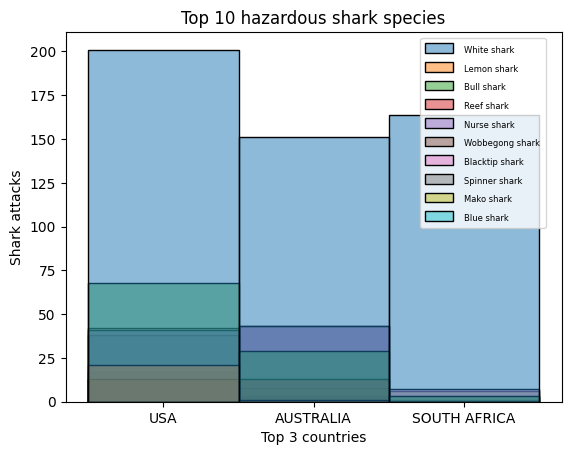

In [210]:
filtered = attacks['Country'].value_counts().head(3)
filtered = filtered.index.tolist()
data_filtered = attacks[attacks['Country'].isin(filtered)]
# Defines only the first 3 countries with the highest numbers. 

filtered = attacks['Categorised_species'].value_counts().head(11)
filtered = filtered.index.tolist()
# Defines only the first 10 species with the highest numbers.

data_filtered = data_filtered[data_filtered['Categorised_species'].isin(filtered)]
data_filtered = data_filtered[data_filtered['Categorised_species'] != "unknown"]
# For species, the value "unknown" is not included in the histogram. 

histplot = sns.histplot(data=data_filtered, x="Country", hue="Categorised_species")
plt.title("Top 10 hazardous shark species")
# The title of the graph is changed to "Top 5 hazardous shark species".

plt.xlabel("Top 3 countries")
# The title of X-axis is changed to "Top 3 countries".

plt.ylabel("Shark attacks")
# The title of Y-axis is changed to "Top 3 countries".

legend = histplot.get_legend()
legend.set_title('')
#The title of the legend is deleted.

for label in legend.get_texts():
    label.set_fontsize(6)
# The fontsize of the legend is changed to 9. 
    
legend.set_bbox_to_anchor((0.7,0.45))
# The position of the legend is changed. 

plt.show()

In [211]:
histplot.figure.savefig('../Top 10 hazardous shark species.png')
# Saves figure in a file with a "png" format. 

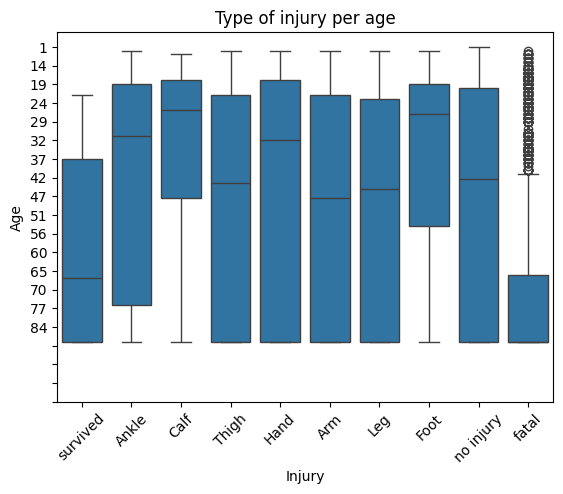

In [212]:
filtered_2 = attacks['Injury'].value_counts().head(10)
filtered_2 = filtered_2.index.tolist()
data_filtered_2 = attacks[attacks['Injury'].isin(filtered_2)]
# Defines the 10 first types of injuries. 

order = filtered_2[::-1]
# Sorts "filtered_2" in descending order
sns.boxplot(x="Injury", y=sorted(data_filtered_2["Age"], reverse=False), data=data_filtered_2, order=order)
# Creates the boxplot.

plt.yticks(range(0, 100, 5))
plt.xticks(rotation=45)  
# Defines the range of the "age" and rotates "injury".

plt.ylabel("Age")
# The laber of the y-axis is added as "Age".

plt.title("Type of injury per age")
# The title of the graph is defined as "Type of injury per age".

# The title of Y-axis is changed to "Top 3 countries".
plt.show()


In [221]:
plt.savefig("Type of injury per age.png", dpi=500)

<Figure size 640x480 with 0 Axes>

In [213]:
plt.savefig("Type of injury per age.png", dpi=500)
plt.close()
plt.show()
# Saves figure in a file with a "png" format. 

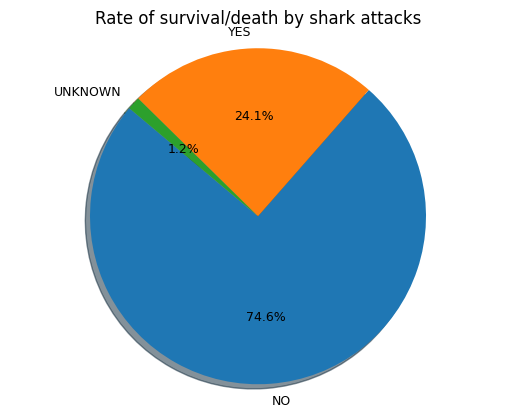

In [217]:
labels = ['NO', 'YES', 'UNKNOWN']
sizes = [4302, 1389, 72]
# Indicates the data to be analised.

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 9})
plt.axis('equal')  
# Creates the pie chart.

plt.title('Rate of survival/death by shark attacks')
plt.show()
# Defines the title of the graph.

In [218]:
plt.savefig('piechart.png', dpi=300)
plt.close()
plt.show()